In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.06G/1.06G [00:08<00:00, 226MB/s]
100% 1.06G/1.06G [00:08<00:00, 141MB/s]


In [6]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [18]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D,Flatten,BatchNormalization,Dropout

In [8]:
#generators
train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels ='inferred',
    label_mode ='int',
    batch_size = 32,
    image_size=(256,256)
)


validation_ds = keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels ='inferred',
    label_mode ='int',
    batch_size = 32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [9]:
#Normalize
def process(image, label):
  image = tf.cast(image/255. , tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

#CNN Model


In [20]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3),padding ='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides= 2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3),padding ='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides= 2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3),padding ='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides= 2, padding='valid'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))



In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [22]:
model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [23]:
history =model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 67s 101ms/step - loss: 1.5913 - accuracy: 0.5774 - val_loss: 0.6397 - val_accuracy: 0.6018
Epoch 2/10
625/625 [==============================] - 67s 106ms/step - loss: 0.5949 - accuracy: 0.6878 - val_loss: 0.5471 - val_accuracy: 0.7306
Epoch 3/10
625/625 [==============================] - 63s 100ms/step - loss: 0.5519 - accuracy: 0.7351 - val_loss: 0.5444 - val_accuracy: 0.7340
Epoch 4/10
625/625 [==============================] - 63s 100ms/step - loss: 0.4609 - accuracy: 0.7853 - val_loss: 0.4667 - val_accuracy: 0.7756
Epoch 5/10
625/625 [==============================] - 63s 100ms/step - loss: 0.4002 - accuracy: 0.8210 - val_loss: 0.5405 - val_accuracy: 0.7498
Epoch 6/10
625/625 [==============================] - 64s 102ms/step - loss: 0.3392 - accuracy: 0.8512 - val_loss: 0.5514 - val_accuracy: 0.7740
Epoch 7/10
625/625 [==============================] - 65s 103ms/step - loss: 0.2498 - accuracy: 0.8979 - val_loss: 0.6511 - val_ac

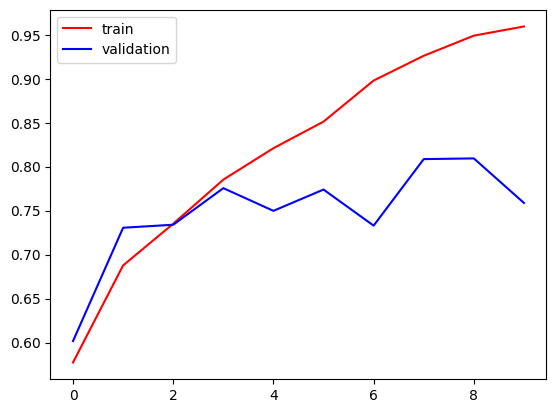

In [24]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color ='blue', label='validation')
plt.legend()
plt.show()

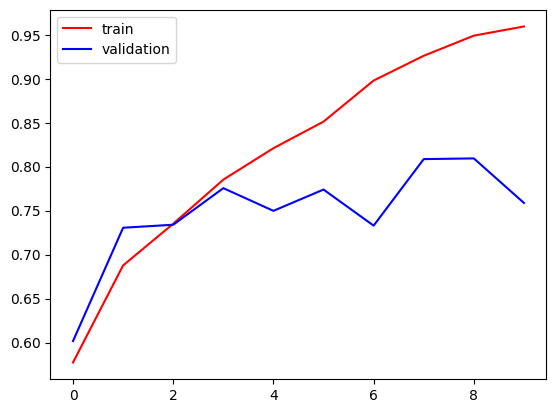

In [25]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

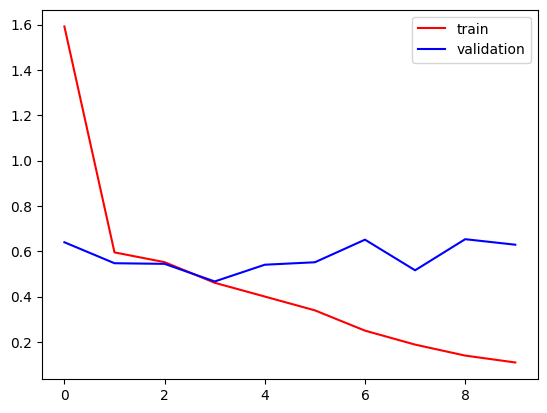

In [26]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

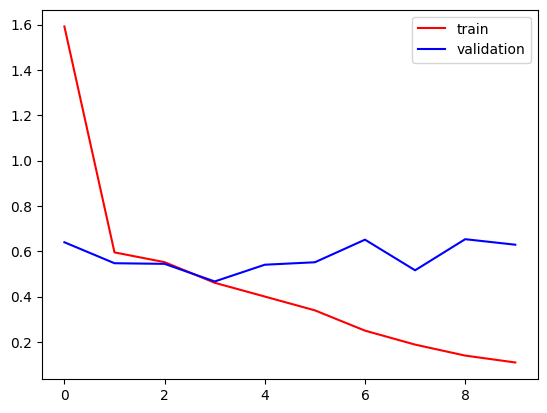

In [27]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [15]:
#reduce the overfitting

In [28]:
import cv2

In [45]:
test_img1 = cv2.imread('/content/cat1.jpg')

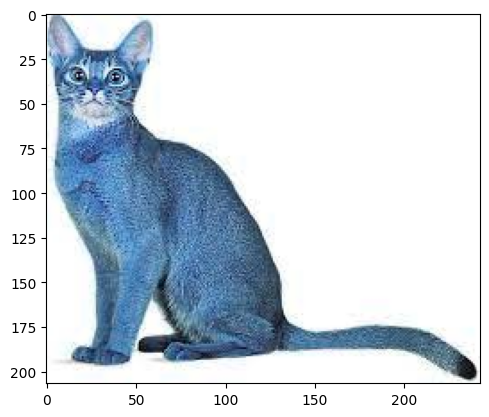

In [46]:
plt.imshow(test_img1)

In [47]:
test_img1.shape

(207, 243, 3)

In [48]:
test_img1 =cv2.resize(test_img1,(256,256))

In [49]:
test_input = test_img1.reshape((1,256,256,3))

In [50]:
model.predict(test_input)

1/1 [==============================] - 0s 44ms/step


array([[1.]], dtype=float32)

In [57]:
test_img2 = cv2.imread('/content/download.jpg')

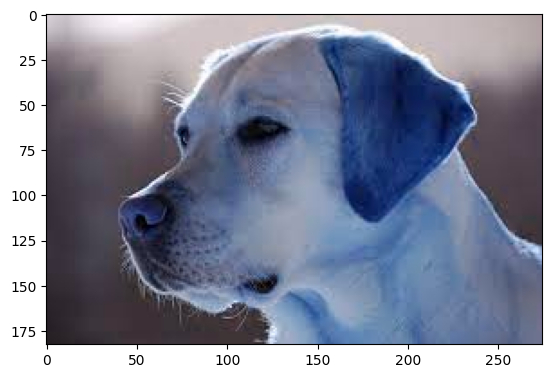

In [58]:
plt.imshow(test_img2)

In [59]:
test_img2.shape

(183, 275, 3)

In [60]:
test_img2 = cv2.resize(test_img2,(256,256))

In [61]:
test_input = test_img2.reshape((1,256,256,3))

In [62]:
model.predict(test_input)

1/1 [==============================] - 0s 18ms/step


array([[1.]], dtype=float32)